In [18]:
import cv2
import numpy as np 
import glob
from tqdm import tqdm
from matplotlib import pyplot as plt 
%matplotlib inline


In [19]:
#Function that Downsamples image x number (reduce_factor) of times. 
def downsample_image(image, reduce_factor):
    for i in range(0,reduce_factor):
        #Check if image is color or grayscale
        if len(image.shape) > 2:
            row,col = image.shape[:2]
        else:
            row,col = image.shape
        image = cv2.pyrDown(image, dstsize= (col//2, row // 2))
    return image

In [20]:
#=========================================================
# Disparity map
#=========================================================

#Specify image paths
img_path1 = '../opencv-np-workshop/data/img/aloeL.jpg'
img_path2 = '../opencv-np-workshop/data/img/aloeR.jpg'

#Load pictures
img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)

# Downsample
img1 = downsample_image(img1,1)
img2 = downsample_image(img2,1)

#Get height and width. Note: It assumes that both pictures are the same size. They HAVE to be same size and height. 
h,w = img2.shape[:2]

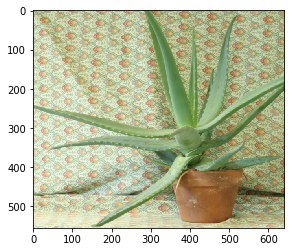

In [21]:
plt.imshow(img1[:,:,::-1])

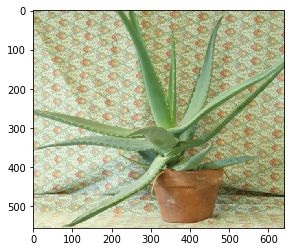

In [22]:
plt.imshow(img2[:,:,::-1])


Computing the disparity  map...


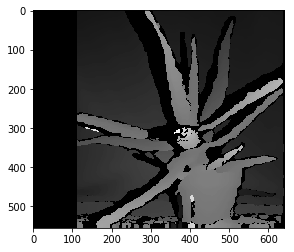

In [23]:
#Set disparity parameters
#Note: disparity range is tuned according to specific parameters obtained through trial and error. 
window_size = 3
min_disp = 16
num_disp = 112-min_disp
stereo = cv2.StereoSGBM_create(minDisparity = min_disp,
        numDisparities = num_disp,
        blockSize = 16,
        P1 = 8*3*window_size**2,
        P2 = 32*3*window_size**2,
        disp12MaxDiff = 1,
        uniquenessRatio = 10,
        speckleWindowSize = 100,
        speckleRange = 32
    )


#Compute disparity map
print ("\nComputing the disparity  map...")
disparity_map = stereo.compute(img1, img2)

#Show disparity map before generating 3D cloud to verify that point cloud will be usable. 
plt.imshow(disparity_map,'gray')
plt.show()

In [24]:
# Save the disparity map
np.save("../opencv-np-workshop/data/3d/disparity_map.npy", disparity_map)
cv2.imwrite("../opencv-np-workshop/data/3d/img1.png", img1);